# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

**Решение:** 

1. Составим минимизируемый функционал

$l=2$ - так как мы хотим найти двумерное пространство в $\mathbb R^p$, которое бы оптимально отражало наши изначальные данные (найти первые 2 главные компоненты, через которые мы будем выражать данные). 

Тогда, 

$W = [w_1, w_2]$ - матрица размера $p\times 2$, в которой столбцы это ортонормированные векторы линейного подпространства $\mathbb R^p$. ($W^T W = I_{2\times2}$)

$Z$ - матрица координат размера $n\times2$, в которой строки $z_i = {(z_{i1}, z_{i2})}^T$ - координаты $i-$того объекта в новом базисе. 

Функция потерь будет вглядеть следующим образом: 

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2 = \sum\limits_{i = 1}^n \|x_i - (w_1 z_{i1}  + w_2 z_{i2} )\|^2
$$

Это и будет минимизируемый функционал. 
Ошибка реконструкции — это кратчайшее расстояние от точки $x_i$ до плоскости, натянутой на векторы $w_1$ и $w_2$. Минимизируя сумму квадратов этих расстояний, мы находим такую плоскость, которая наиболее "близка" ко всем точкам данных, т.е. является наилучшим 2-мерным приближением нашего p-мерного облака точек.

2. Теперь докажем, что новые координаты являются проекциями исходных данных на векторы $w_1$, $w_2$.

Будем минимизировать ошибку реконструкции по новым координатам $z_i$ для фиксированного $W$. 

Рассмотрим $i$-тое наблюдение: $\|x_i - Wz_i\|^2$ - выпуклая квадратичная функция, квадрат нормы линейной функции. Чтобы найти минимумы воспользуемся градиентом.

Градиент квадрата нормы: $\nabla_z\|x_i - Wz_i\|^2 = -2W^T(x_i-Wz_i) = 0$

$$
W^Tx_i-W^TWz_i = 0
$$
$$
W^TW = I 
$$
$$
z_i = W^Tx_i
$$

В координатной форме: 

$z_{i1} = w^T_1x_i$, $z_{i2} = w^T_2x_i$ - скалярные произведения вектора $x_i$ на ортонормированные векторы $w_1$, $w_2$. 

Следовательно, новые координаты это проекции $x_i$ на $w_1$, $w_2$.

В матричной форме: $Z = XW$

3. Докажем, что $w_1$, $w_2$ - это собственные векторы выборочной ковариационной матрицы, которые отвечают двум наибольшим значениям, по убыванию, соответственно.

Подставим в функционал полученное оптимальное $Z = XW$

$$
L(W) = \|X^T - WZ^T\|^2_F = \|X^T - WW^TX^T\|^2_F
$$

Раскроем его по свойству нормы Фробениуса: 

$tr[(X^T - WW^TX^T)^T(X^T - WW^TX^T)] = tr[(X - XWW^T)(X^T - WW^TX^T)] = tr[XX^T - XWW^TX^T - XWW^TX^T + XWW^TWW^TX^T]$
$= tr[XX^T] - tr[XWW^TX^T] = tr[XX^T] - tr[W^TX^TXW]$ 

Введем ковариационную матрицу: $\Sigma = \frac{1}{n}X^TX$

$L(W) = tr[XX^T]-n\cdot tr[W^T\Sigma W]$

$tr[XX^T]$ - константа, поэтому минимизация функцианала может свестись к максимизации $tr[W^TSW]$

Решим эту задачу максимизации: 

$tr[W^TSW] = w_1^T\Sigma w_1 + w_2^T\Sigma w_2$

$w_1^Tw_1 = 1$, 
$w_2^Tw_2 = 1$, 
$w_1^Tw_2 = 0$

Найдем максимум для первой компоненты: 

Максимизируем $w_1^T\Sigma w_1$ при условии $w_1^Tw_1 = 1$. 

Составим функцию Лагранжа и найдем градиет по $w_1$:

$$\mathcal{L}_1(w_1, \lambda_1) = w_1^T\Sigma w_1 - \lambda_1(w_1^Tw_1 - 1)$$

$$\nabla_{w_1}\mathcal{L}_1 = 2\Sigma w_1 - 2\lambda_1 w_1 = 0$$

$$\Sigma w_1 = \lambda_1 w_1$$

$$w_1^T\Sigma w_1 = \lambda_1$$

Таким образом, $w_1$ - собственный вектор ковариационной матрицы, а $\lambda_1$ - соответствующее собственное значение, чтобы решить задачу максимизации для первой компаненты, то нам надо взять наибольшее собственное значение ковариационной матрицы. 

Найдем максимум для второй компоненты: 

Макисмизируем $w_2^T\Sigma w_2$ при условии $w_2^Tw_2 = 1$, $w_1^Tw_2 = 0$.

Составим функцию Лагранжа и найдем градиент: 

$\mathcal{L}_1(w_1, \lambda_1) = w_2^T\Sigma w_2 - \lambda_2(w_2^Tw_2 - 1) - \mu (w_2^Tw_2)$

$\nabla_{w_1}\mathcal{L}_1 = 2\Sigma w_2 - 2\lambda_2 w_2 - \mu w_1 = 0$

Домножим на $w_1^T$ слева: 

$$2w_1^T\Sigma w_2 - 2\lambda_2 w_1^T w_2 - \mu w_1^T w_1 = 0$$

$$2 \lambda_1 \cdot 0 - 2\lambda_2 \cdot 0 + \mu \cdot 1 = 0$$

$$\mu = 0$$

$$2\Sigma w_2 - 2\lambda_2 w_2 = 0$$

$$\Sigma w_2 = \lambda_2 w_2$$

$$w_2^T\Sigma w_2 = \lambda_2$$

Так как $w_2$ должен быть ортогонален первому собственному вектору, а собственные векторы симметричной матрицы ортогональны, то $w_2$ должен быть одним из оставшихся собственных векторов.

Чтобы максимизировать по второй компоненте надо выбрать второе по величине собственное значение. 

4. Покажем, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

Выборочная дисперсия вектора $z_1$ по определению:

$$D(z_1) = \frac{\Sigma(z_{1i} - mean(z_1))}{n-1}$$

$mean(z_1) = 0$ - так как данные центрированы

$$D(z_1) = \frac{z_1^T z_1}{n-1} = \frac{w_1^TX^TXw_1^T}{n-1} = w_1^T\Sigma w_1^T = \lambda_1$$ - то есть, выборочная дисперсия новых координат равна собственным числам ковариационной матрицы. 

Для второй компоненты все аналогично. 

$\lambda_1$ - дисперсия проекций на направление максимальной растянутости

$\lambda_2$ - дисперсия проекций на направление второй по значимости растянутости

Собственные векторы указывают направления главных осей эллипсоида рассеяния.


## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

**Решение:** 

1. Возьмем любую случайную матрицу 3х3, чтобы дальше с ней работать. 

In [23]:
import numpy as np

X = np.random.randint(0, 5, size = (3, 3))
XXT = X @ X.T

print(X)
print()
print(XXT)

[[4 0 1]
 [3 1 1]
 [1 4 2]]

[[17 13  6]
 [13 11  9]
 [ 6  9 21]]


По спектральной теореме любая симметричная матрица диагонализуема в ортонормированном базисе. 
То есть существует такая ортогональная матрица $U$, что: 

$$U^T(XX^T)U = \Lambda$$

$\Lambda$ - диагональная матрица из собственных значений.

Найдем это на примере: 
1. Найдем собственные значения $XX^T$ и матрицу $U$

In [100]:
l, U = np.linalg.eig(XXT)
print(l.round(0))
print(U.round(4))

[35. 14.  0.]
[[-0.5894 -0.5882  0.5538]
 [-0.5424 -0.2199 -0.8108]
 [-0.5987  0.7782  0.1894]]


Теперь проверим ортогональность матрицы $U$

In [38]:
UTU = U.T @ U
print(UTU.round(0))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Проверим диагонализацию и что на диагонали действительно собственные числа: 

In [45]:
Diag = U.T @ XXT @ U
print(Diag.round(0))

[[35.  0.  0.]
 [ 0. 14. -0.]
 [ 0. -0.  0.]]


2. Докажем цепочку равенств

$$
XX^TU = U \Lambda,
$$

In [64]:
print(np.allclose(XXT @ U, U @ Diag))

print(np.round(XXT @ U, 4))

True
[[-20.6626  -8.1889   0.0102]
 [-19.0165  -3.0616  -0.015 ]
 [-20.9908  10.8345   0.0035]]


$$
X^TXX^TU = X^TU \Lambda,
$$

In [66]:
print(np.allclose(X.T @ XXT @ U, X.T @ U @ Diag))
print(np.round(X.T @ U @ Diag, 4))

True
[[-160.6904  -31.106    -0.0005]
 [-102.9796   40.2765   -0.001 ]
 [ -81.6606   10.4185    0.0022]]


$$
(X^TX)(X^TU) = X^TU \Lambda
$$

In [78]:
print(np.allclose((X.T @ X) @ (X.T @ U), X.T @ U @ Diag))

True


$X^TU$ — матрица из собственных векторов для $X^TX$.

In [93]:
XTX = X.T @ X
l_xtx, U_xtx = np.linalg.eig(XTX)
XTU = X.T @ U
w1 = XTU[:, 0]
print("Первый столбец Xᵀ U (w₁):", w1)

XTX = X.T @ X
result = XTX @ w1
print("(Xᵀ X) × w₁ =", result)
 
expected = l[0] * w1
print("λ₁ × w₁ =", expected)

Первый столбец Xᵀ U (w₁): [-4.58334084 -2.93726722 -2.32918902]
(Xᵀ X) × w₁ = [-160.69043372 -102.97962989  -81.66060674]
λ₁ × w₁ = [-160.69043372 -102.97962989  -81.66060674]


Для других столбцов аналогично. 

3. Покажем, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

Сначала проверим ортогональность:

In [95]:
for i in range(XTU.shape[0]):
    for j in range(i+1, XTU.shape[0]):
        dp = XTU[:, i] @ XTU[:, j]
        print(f"v_{i+1}·v_{j+1} = {dp:.5f}")

v_1·v_2 = 0.00000
v_1·v_3 = 0.00000
v_2·v_3 = -0.00000


Теперь проверим ортонормированность:

In [97]:
for i in range(XTU.shape[0]):
    norm = np.linalg.norm(XTU[:, i])
    print(f"||v_{i+1}|| = {norm:.6f}")

||v_1|| = 5.921121
||v_2|| = 3.731205
||v_3|| = 0.135790


Нормы столбцов не равны 1, а следовательно не ортонормированны.

4. Найдем нормы столбцов $X^TU$, приведем преобразование к ортогональному. Получим аналог `PCA`.

Для i-го столбца $v_i = X^Tu_i$:

$$
\|v_i\|^2 = v_i^Tv_i = (X^Tu_i)^T(X^Tu_i) = u_i^TXX^Tu_i = u_i^T\lambda_iu_i = \lambda_i(u_i^Tu_i) = \lambda_i
$$

То есть норма каждого столбца равна корню из соответсвующего собственного числа. 

In [103]:
print(np.sqrt(l))

[5.92112097 3.73120456 0.13579015]


Теперь пронормируем каждый столбец: 

$$w_i = \frac{v_i}{\|v_i\|} = \frac{X^Tu_i}{\sqrt{\lambda_i}}$$

В матричной форме: 

$$W = X^TU\Lambda^{-0.5}$$

где $\Lambda^{-1/2} = \text{diag}(1/\sqrt{\lambda_1}, 1/\sqrt{\lambda_2}, \dots)$

In [108]:
W = X.T @ U @ np.diag(1.0 / np.sqrt(l))
print(W.round(4))

[[-0.7741 -0.5988 -0.2055]
 [-0.4961  0.7754 -0.3908]
 [-0.3934  0.2006  0.8972]]


Построим полный аналог PCA: 

Получается, что $X^TU$ - матрица векторов главных компонет, тк столбцы в ней это собственные вектора. 
$W$ - ортонормированные главные компонеты. 

$$Z = XW$$ - новые координаты. 

In [116]:
Z = X @ W 
print(Z)

[[-3.48963524 -2.19471891  0.07519822]
 [-3.2116349  -0.82053566 -0.11010208]
 [-3.54506991  2.90375922  0.02572399]]


## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [121]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(np.float64(-0.5), np.float64(419.5), np.float64(279.5), np.float64(-0.5))

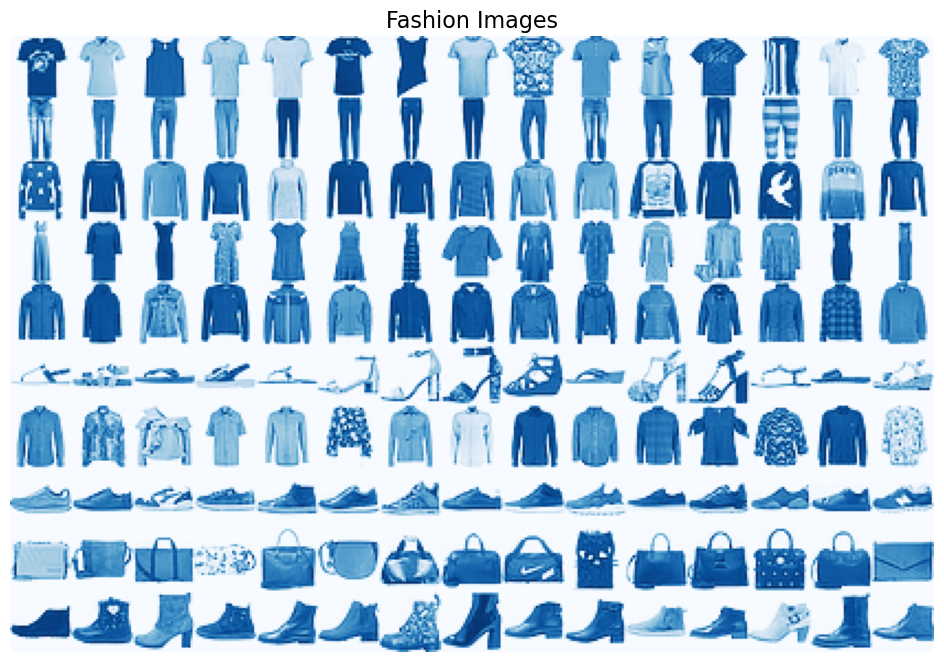

In [122]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [123]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [124]:
from sklearn.model_selection import train_test_split

random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = random_state)

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(max_iter=2000, tol=0.001, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"f1: {f1:.4f}")

f1: 0.7477


**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:** 
F1-score — это гармоническое среднее между точностью (precision) и полнотой (recall). Метрика показывает баланс между "ложными срабатываниями" и "пропущенными целями".

- Точность — доля объектов, действительно принадлежащих к классу, среди всех объектов, которые модель отнесла к этому классу. Высокая точность означает, что если модель отнесла объект к классу, то она редко ошибается.
- Полнота — доля объектов класса, которые модель правильно идентифицировала среди всех объектов класса в тестовой выборке. Высокая полнота означает, что модель пропускает очень мало релевантных объектов.

**Плюсы:**

- Устойчивость к дисбалансу: В отличие от Accuracy, F1-score не дает завышенных оценок на дисбалансных выборках, где один класс значительно преобладает. Это делает его более надежным индикатором реального качества модели.
- Комплексность: Метрика инкапсулирует в одном числе информацию о двух фундаментальных типах ошибок, позволяя сравнивать модели более объективно.

**Минусы:**
- Интерпретируемость: Абсолютное значение F1-score менее интуитивно, чем Accuracy. Значение 0.8 само по себе не раскрывает, чем именно жертвует модель — точностью или полнотой.
- Усреднение проблем: В многоклассовой задаче высокое усредненное значение F1-score может маскировать низкое качество распознавания для отдельных, но важных классов.

Параметры агреграции (average) из документации `sklearn.metrics.f1_score`:

Этот параметр является обязательным для многоклассовых или многометочных целевых переменных. Если задано значение `None`, возвращаются метрики для каждого класса в отдельности. В противном случае этот параметр определяет тип усреднения, выполняемого над данными:

1. `binary` (бинарный): Отчет формируется только для класса, указанного в параметре `pos_label`. Применимо только в случае, если целевые переменные `(y_{true,pred})` являются бинарными.
2. `micro` (микро): Вычисляет метрики глобально, подсчитывая общее количество истинно положительных, ложно отрицательных и ложно положительных случаев.
3. `macro` (макро): Вычисляет метрики для каждой метки и находит их невзвешенное среднее значение. Этот метод не учитывает дисбаланс классов.
4. `weighted` (взвешенный): Вычисляет метрики для каждой метки и находит их среднее значение, взвешенное по поддержке (количеству истинных экземпляров для каждой метки). Это модификация метода `macro`, которая учитывает дисбаланс меток; это может привести к F-мере, значение которой не находится между точностью и полнотой.
5. `samples` (по образцам): Вычисляет метрики для каждого отдельного экземпляра и находит их среднее значение. Имеет смысл только для многометочной классификации, где этот подход отличается от `accuracy_score`.

Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

Scale =  0


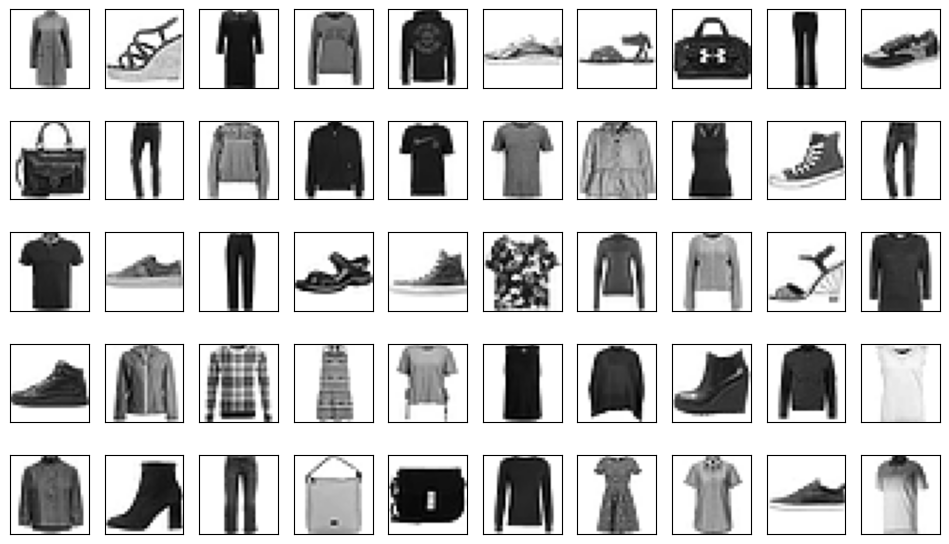

Scale =  50


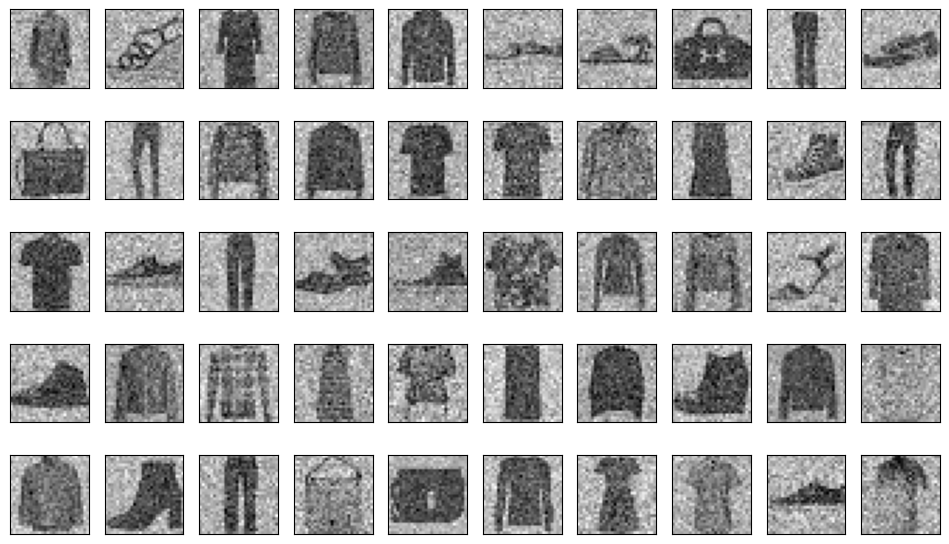

Scale =  100


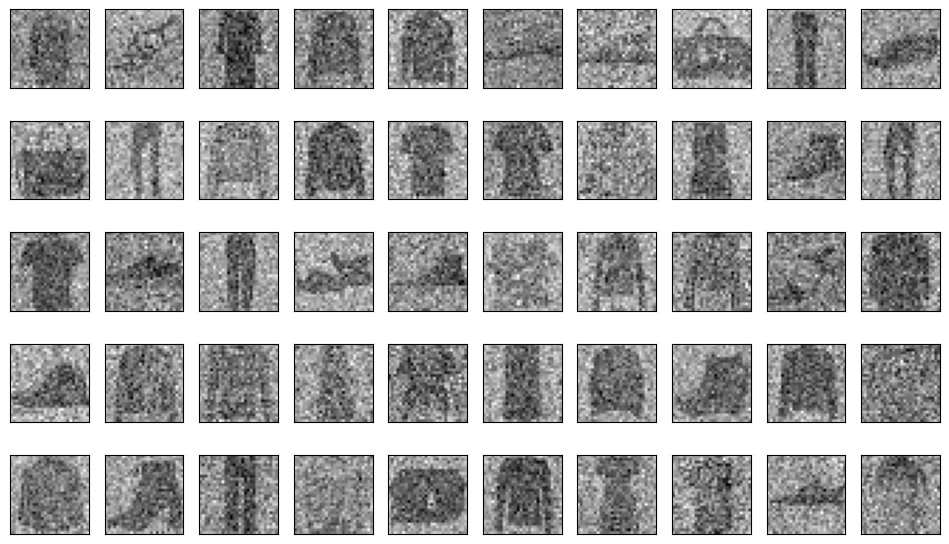

Scale =  150


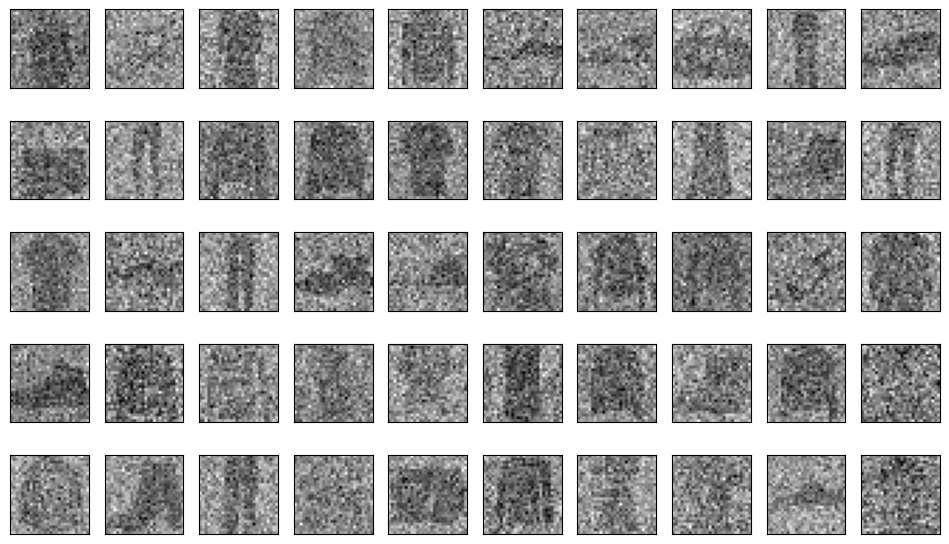

Scale =  200


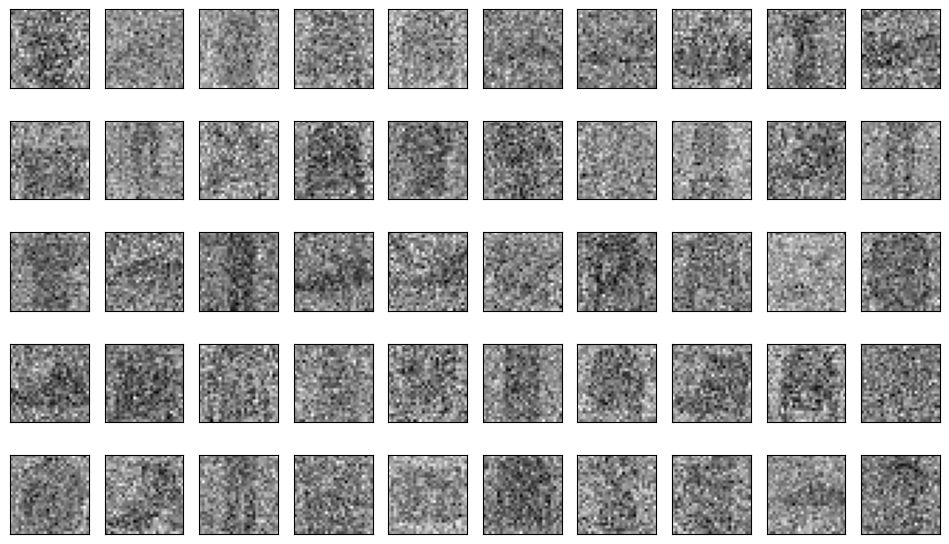

In [132]:
scales = [0, 50, 100, 150, 200]
X_test_noisy_s = []

for scale in scales:
    print('Scale = ', scale)
    X_test_noisy = X_test + np.random.normal(0, scale, X_test.shape)
    X_test_noisy_s.append(X_test_noisy)

    fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)
    plt.show()

**Ваши выводы:** Чем больше `scale`, тем хуже распрознается одежда. То есть с добавлением шума значение признаков смещается. 

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [134]:
f1_scores = []

for i in range(len(scales)):
    y_pred = model.predict(X_test_noisy_s[i])
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)
    print(f'Для scale = {scales[i]}, f1-score = {f1}')

Для scale = 0, f1-score = 0.7476933762049526
Для scale = 50, f1-score = 0.5417221100915877
Для scale = 100, f1-score = 0.3866832952386527
Для scale = 150, f1-score = 0.2848104034785049
Для scale = 200, f1-score = 0.2583771133488475


**Ваши выводы:** 

F1-score монотонно уменьшается при увеличении параметра `scale`, т.е. с увеличением уровня шума качество модели снижается. Это происходит потому что добавленный шум искажает признаки объектов, на основе которых модель классифицирует новые данные. 

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

Scale =  0


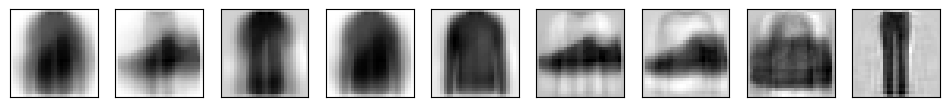

Scale =  50


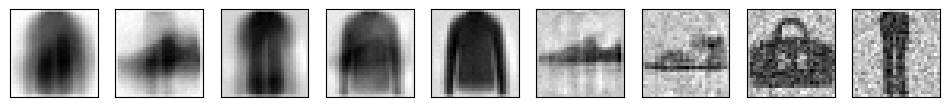

Scale =  100


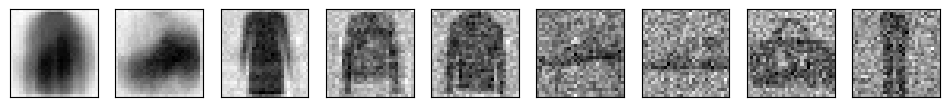

Scale =  150


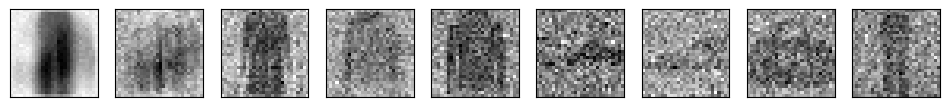

Scale =  200


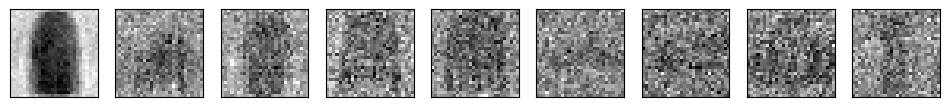

In [160]:
from sklearn.decomposition import PCA

explained_variances = np.arange(0.1, 1.0, 0.1)
res_X__test_noisy_s = []

for j in range(len(scales)):
    print('Scale = ', scales[j])
    restored_X_test_noisy = []

    for e_var in explained_variances:
        pca = PCA(n_components = e_var, random_state = random_state)
        X_noisy_pca = pca.fit_transform(X_test_noisy_s[j])
        X_res = pca.inverse_transform(X_noisy_pca)
        restored_X_test_noisy.append(X_res)

    res_X__test_noisy_s.append(restored_X_test_noisy)

    fig, axes = plt.subplots(1, 9, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
       ax.imshow(restored_X_test_noisy[i % 9][i].reshape(28, 28), cmap=plt.cm.gray_r)
    plt.show()

**Ваши выводы:** 

PCA эффективно подавляет шум, проецируя данные на главные компоненты, где сосредоточен полезный сигнал. Поскольку шум распределен равномерно, а информация концентрируется в первых компонентах, обратное преобразование частично его фильтрует. Метод обеспечивает компромисс: меньше компонент — лучше подавление шума, но больше потерь деталей; больше компонент — выше детализация, но слабее фильтрация.

При этом, чем выше доля объясненной дисперсии, тем лучше восстанавливается картинка. 

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [168]:
f1_scores_res = []

for i in range(len(scales)):
    print(f'Для scale = {scales[i]}')
    for e_var in explained_variances:
        j = int(e_var*10)
        y_pred = model.predict(res_X__test_noisy_s[i][j-1])
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores_res.append(f1)
        print(f'Для explained variance = {e_var.round(1)}, f1-score = {f1}')

Для scale = 0
Для explained variance = 0.1, f1-score = 0.0666921239302798
Для explained variance = 0.2, f1-score = 0.0666921239302798
Для explained variance = 0.3, f1-score = 0.20106393416101737
Для explained variance = 0.4, f1-score = 0.20106393416101737
Для explained variance = 0.5, f1-score = 0.2894624203823979
Для explained variance = 0.6, f1-score = 0.5112482734353812
Для explained variance = 0.7, f1-score = 0.6047226560054271
Для explained variance = 0.8, f1-score = 0.7160617761415465
Для explained variance = 0.9, f1-score = 0.7844354062348562
Для scale = 50
Для explained variance = 0.1, f1-score = 0.0643284200772253
Для explained variance = 0.2, f1-score = 0.0643284200772253
Для explained variance = 0.3, f1-score = 0.20546086538701638
Для explained variance = 0.4, f1-score = 0.45351720770546117
Для explained variance = 0.5, f1-score = 0.6417314791907387
Для explained variance = 0.6, f1-score = 0.6930905115542503
Для explained variance = 0.7, f1-score = 0.6787672391596968
Для exp

В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперcии (таблицы, графики, диаграммы). Сделайте выводы.

In [180]:
import pandas as pd

res_data = []
for i in range(len(scales)):
    for j, e_var in enumerate(explained_variances):
        f1_value = f1_scores_res[i * len(explained_variances) + j]
        res_data.append({
            'Уровень_шума': scales[i],
            'Объясненная_дисперсия': e_var.round(1),
            'F1_Score': f1_value
        })
df_results = pd.DataFrame(res_data)
pivot_table = df_results.pivot_table(
    index='Уровень_шума', 
    columns='Объясненная_дисперсия', 
    values='F1_Score'
)
pivot_table

Объясненная_дисперсия       0.1       0.2       0.3       0.4       0.5  \
Уровень_шума                                                              
0                      0.066692  0.066692  0.201064  0.201064  0.289462   
50                     0.064328  0.064328  0.205461  0.453517  0.641731   
100                    0.061339  0.367813  0.641275  0.575374  0.521931   
150                    0.278013  0.541808  0.466420  0.404540  0.377530   
200                    0.516057  0.401364  0.369700  0.342480  0.327524   

Объясненная_дисперсия       0.6       0.7       0.8       0.9  
Уровень_шума                                                   
0                      0.511248  0.604723  0.716062  0.784435  
50                     0.693091  0.678767  0.620478  0.576322  
100                    0.480360  0.448941  0.432798  0.408415  
150                    0.348422  0.331496  0.315524  0.296693  
200                    0.296271  0.290475  0.282241  0.277333

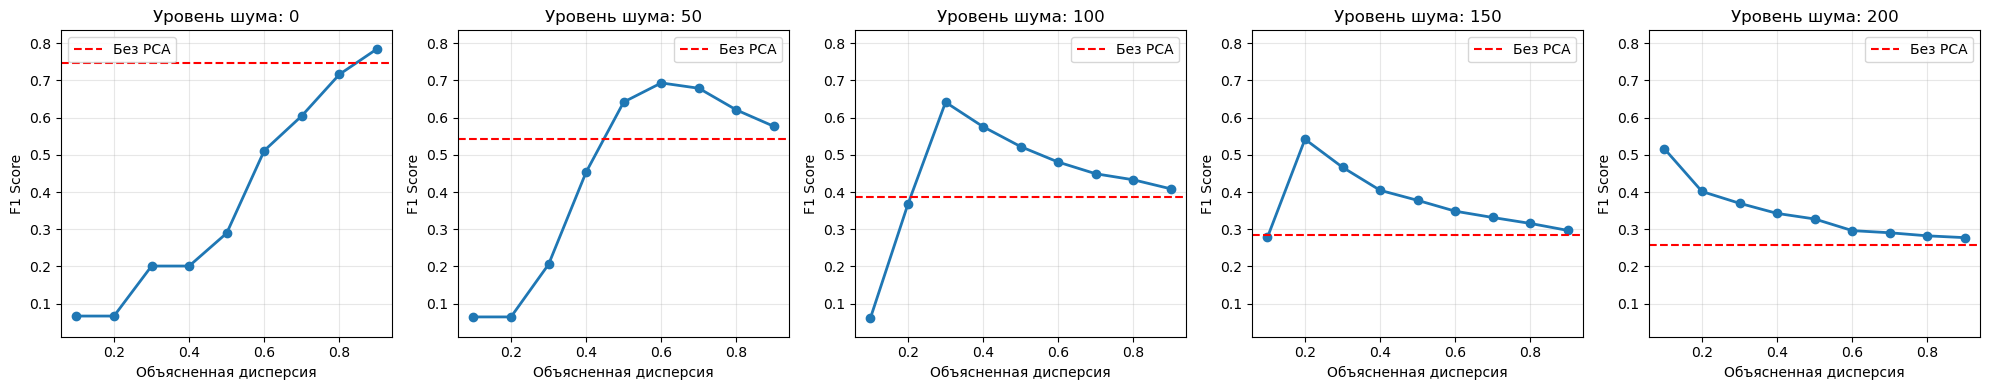

In [188]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, scale in enumerate(scales):
    noise_data = df_results[df_results['Уровень_шума'] == scale]
    
    noise_data = noise_data.sort_values('Объясненная_дисперсия')
    
    axes[i].plot(noise_data['Объясненная_дисперсия'], 
                noise_data['F1_Score'], 
                marker='o', 
                linewidth=2,
                markersize=6)
    
    axes[i].set_title(f'Уровень шума: {scale}')
    axes[i].set_xlabel('Объясненная дисперсия')
    axes[i].set_ylabel('F1 Score')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=f1_scores[i], linestyle='--', color = 'red', 
               label=f'Без PCA')
    axes[i].legend()

    
    axes[i].set_ylim(df_results['F1_Score'].min() - 0.05, 
                    df_results['F1_Score'].max() + 0.05)

plt.tight_layout()
plt.show()

**Ваши выводы:** 

В результате анализ аможно сделать вывод, что  метод главных компонент (PCA) является эффективным инструментом для повышения качества классификации зашумленных изображений, что подтверждается ростом метрики F1-score после его применения по сравнению с классификацией на необработанных зашумленных данных.

При этом существует определенная зависимость между уровнем шума и оптимальными параметрами для PCA. 

Эффективность PCA в данной задаче основана на его способности отделять основную структуру данных от шума. Однако можно заметить, что:

- Слишком мало компонент (низкая доля объясненной дисперсии, например, < 0.3) приводит к избыточной фильтрации, при которой вместе с шумом теряются и важные признаки, необходимые для классификации.
- Слишком много компонент (высокая доля дисперсии, например, > 0.6) позволяет сохранить больше деталей, но при этом в восстановленные данные проникает и значительная часть шума. Это особенно критично при высоких уровнях зашумления, где интенсивность шума сопоставима с основными данными.

Можно сделать вывод, что чем выше исходный уровень шума, тем ниже должна быть оптимальная доля объясненной дисперсии.

1. При низком и умеренном шуме структура данных повреждена незначительно. PCA используется для "тонкой очистки", и для достижения наилучшего F1-score можно позволить себе сохранить большую долю дисперсии (0.6 – 0.9), чтобы не потерять полезные детали.
2. При высоком уровне шума различить основные детали становится гораздо сложнее. Чтобы эффективно подавить доминирующий шум, требуется более агрессивная фильтрация, которая достигается за счет уменьшения доли объясненной дисперсии (0.1 – 0.5). В этом случае мы сознательно жертвуем частью деталей, чтобы выделить и сохранить лишь самые основные, наиболее устойчивые черты.

Наилучшие результаты достигаются тогда, когда степень сжатия данных соответствует интенсивности шума: для сильного шума применяется сильное сжатие, для слабого — слабое. Это позволяет найти точку баланса, в которой подавление шума максимально, а потеря информативных признаков — минимальна.

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Ваш ответ:** 

`SNE`:

$$
q_{ij} = \frac{e^{-||y_i - y_j||^2}}{Z} \quad Z = \sum_{k \neq l} e^{-||y_k - y_l||^2}
$$

$$
C =\sum_{i} \sum_{j \neq i} p_{ij} \log \frac{p_{ij}}{q_{ij}} = \sum_{j \neq i} p_{ij} \log p_{ij} - \sum_{j \neq i} p_{ij} \log q_{ij}
$$

Первое слагаемое не зависит от $y$, поэтому:

$$
\frac{\partial C}{\partial y_i} = - \sum_{j \neq i}p_{ij}\frac{\partial \log q_{ij}}{\partial y_i}
$$

$$
\log q_{ij} = -||y_i - y_j||^2 - \log Z 
$$
$$
\frac{\partial \log q_{ij}}{\partial y_i} = -2(y_i - y_j) - \frac{1}{Z} \frac{\partial Z}{\partial y_i}
$$

$$
\frac{\partial Z}{\partial y_i} = \sum_{k \neq l} \frac{\partial}{\partial y_i} e^{-||y_k - y_l||^2} = -4 \sum_{m \neq i} (y_i - y_m) e^{-||y_i - y_m||^2}
$$

$$
\frac{\partial C}{\partial y_i} = 4 \sum_{i \neq j}(p_{ij} - q_{ij})(y_i - y_j)
$$


`t-SNE`:

$$
q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{Z} \quad Z = \sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}
$$

$$
\log q_{ij} = -\log((1 + ||y_i - y_j||^2)^{-1}) - \log Z
$$
$$
\frac{\partial \log q_{ij}}{\partial y_i} = - \frac{2(y_i - y_j)}{1 + ||y_i - y_j||^2} - \frac{1}{Z} \frac{\partial Z}{\partial y_i}
$$

$$
\frac{\partial Z}{\partial y_i} = \sum_{m \neq i} \frac{\partial}{\partial y_i} (1 + ||y_i - y_m||^2) + \sum_{m \neq i} \frac{\partial}{\partial y_i} (1 + ||y_m - y_i||^2) = -4 \sum_{m \neq i} \frac{y_i - y_m}{(1 + ||y_i - y_m||^2)^2}
$$

$$
\frac{\partial C}{\partial y_i} = 4 \sum_{i \neq j} (p_{ij} - q_{ij})\frac{y_i - y_j}{(1 + ||y_i - y_j||^2)}
$$

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:


=== Перплексия = 5 ===
SNE...
SNE iter 0, KL=2.33909
SNE iter 200, KL=3.34088
SNE iter 400, KL=5.10747
SNE iter 600, KL=8.78289
t-SNE...
t-SNE iter 0, KL=2.33909
t-SNE iter 200, KL=0.24118
t-SNE iter 400, KL=0.47641
t-SNE iter 600, KL=0.48326

=== Перплексия = 15 ===
SNE...
SNE iter 0, KL=1.36804
SNE iter 200, KL=0.01278
SNE iter 400, KL=0.01278
SNE iter 600, KL=0.01278
t-SNE...
t-SNE iter 0, KL=1.36804
t-SNE iter 200, KL=0.00714
t-SNE iter 400, KL=0.00416
t-SNE iter 600, KL=0.00377

=== Перплексия = 25 ===
SNE...
SNE iter 0, KL=0.85453
SNE iter 200, KL=0.02673
SNE iter 400, KL=0.02673
SNE iter 600, KL=0.02673
t-SNE...
t-SNE iter 0, KL=0.85453
t-SNE iter 200, KL=0.01873
t-SNE iter 400, KL=0.01873
t-SNE iter 600, KL=0.01873

=== Перплексия = 35 ===
SNE...
SNE iter 0, KL=0.51796
SNE iter 200, KL=0.07376
SNE iter 400, KL=0.07376
SNE iter 600, KL=0.07376
t-SNE...
t-SNE iter 0, KL=0.51796
t-SNE iter 200, KL=0.02617
t-SNE iter 400, KL=0.02617
t-SNE iter 600, KL=0.02617

=== Перплексия = 45 

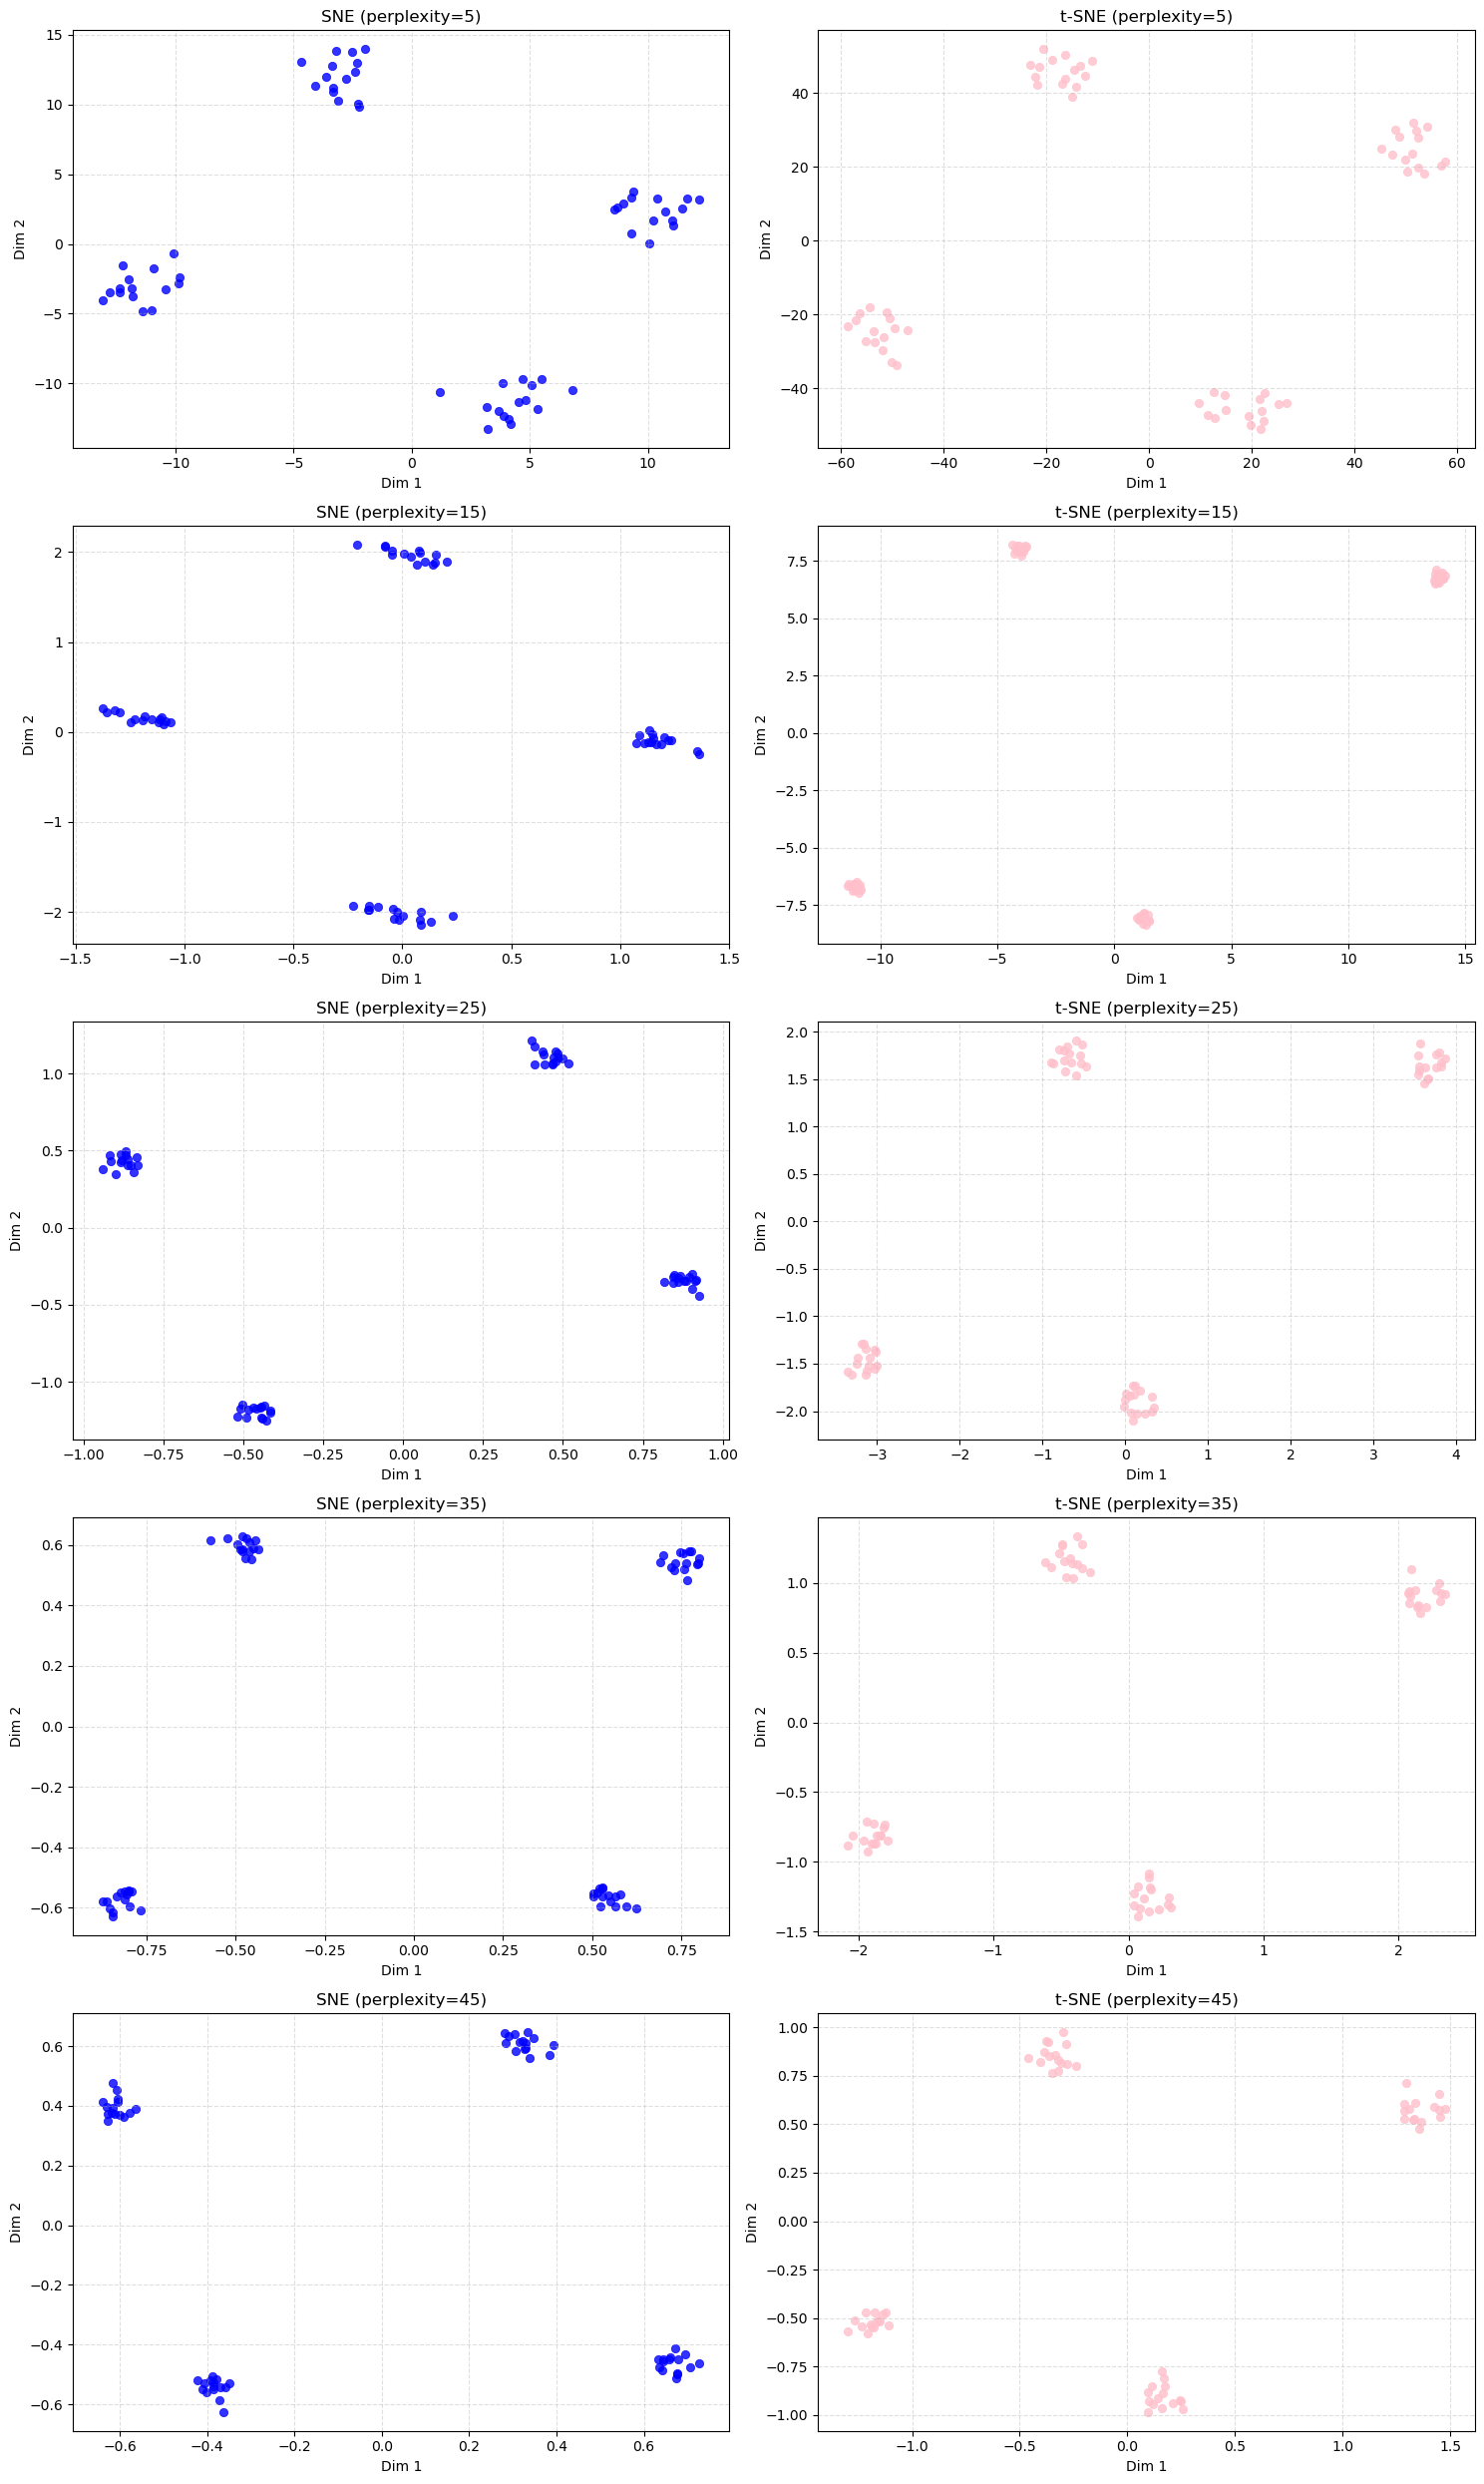

In [239]:
import pandas as pd
import matplotlib.pyplot as plt

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)

X = data.to_numpy().astype(float)
X = (X - X.mean(axis=0)) / X.std(axis=0, ddof=1)

N = X.shape[0]

def pairwise_sq_dists(Z):
    n = Z.shape[0]
    D = np.zeros((n, n))
    for i in range(n):
        diff = Z[i] - Z
        D[i] = np.sum(diff * diff, axis=1)
    return D

D_X = pairwise_sq_dists(X)


def build_joint_probabilities(D, perplexity):
    n = D.shape[0]
    P = np.zeros((n, n))

    target_entropy = np.log2(perplexity)

    for i in range(n):
        beta_low, beta_high = 1e-3, 1e3
        mask = np.arange(n) != i
        dist = D[i, mask]

        for _ in range(60):
            beta = (beta_low + beta_high) / 2
            vals = np.exp(-dist * beta)
            vals /= vals.sum()

            entropy = -np.sum(vals * np.log2(vals + 1e-15))

            if entropy > target_entropy:
                beta_low = beta
            else:
                beta_high = beta

        P[i, mask] = vals

    P = (P + P.T) / (2 * n)
    P /= P.sum()
    np.fill_diagonal(P, 0.0)
    return P


def run_sne(P, iters=800, lr=50.0):
    n = P.shape[0]
    Y = np.random.randn(n, 2) * 1e-4
    update = np.zeros_like(Y)

    for it in range(iters):
        DY = pairwise_sq_dists(Y)
        Q = np.exp(-DY)
        np.fill_diagonal(Q, 0)
        Q /= Q.sum()

        grad = np.zeros_like(Y)
        for i in range(n):
            diff = Y[i] - Y
            grad[i] = 2 * np.sum((P[i] - Q[i])[:, None] * diff, axis=0)

        update = 0.9 * update + lr * grad
        Y -= update

        if it % 200 == 0:
            kl = np.sum(P * np.log((P + 1e-15) / (Q + 1e-15)))
            print(f"SNE iter {it}, KL={kl:.5f}")

    return Y


def run_tsne(P, iters=800, lr=100.0):
    n = P.shape[0]
    np.random.seed(42)
    Y = np.random.randn(n, 2) * 1e-4
    upd = np.zeros_like(Y)

    for it in range(iters):
        DY = pairwise_sq_dists(Y)
        num = 1 / (1 + DY)
        np.fill_diagonal(num, 0.0)
        Z = num.sum()
        Q = num / Z

        grad = np.zeros_like(Y)
        for i in range(n):
            diff = Y[i] - Y
            grad[i] = 4 * np.sum((P[i] - Q[i]) * num[i] * diff.T, axis=1)

        momentum = 0.5 if it < 250 else 0.9
        upd = momentum * upd - lr * grad
        Y += upd
        Y -= Y.mean(axis=0)

        if it % 200 == 0:
            kl = np.sum(P * np.log((P + 1e-15) / (Q + 1e-15)))
            print(f"t-SNE iter {it}, KL={kl:.5f}")

    return Y

perps = list(range(5, 50, 10))
fig, axs = plt.subplots(len(perps), 2, figsize=(15, 5 * len(perps)))

if len(perps) == 1:
    axs = axs.reshape(1, -1)

results_tsne = {}

for row, perp in enumerate(perps):
    print(f"\n=== Перплексия = {perp} ===")
    P = build_joint_probabilities(D_X, perplexity=perp)

    print("SNE...")
    Y_sne = run_sne(P)
    print("t-SNE...")
    Y_tsne = run_tsne(P)
    results_tsne[perp] = Y_tsne

    ax1, ax2 = axs[row]
    
    ax1.scatter(
        Y_sne[:, 0], Y_sne[:, 1],
        s=35,
        marker="o",
        c="blue",
        linewidth=0.6,
        alpha=0.8
    )
    ax1.set_title(f"SNE (perplexity={perp})")
    ax1.set_xlabel("Dim 1")
    ax1.set_ylabel("Dim 2")
    ax1.grid(True, linestyle="--", alpha=0.4)

    ax2.scatter(
        Y_tsne[:, 0], Y_tsne[:, 1],
        s=35,
        marker="o",
        c="pink",
        linewidth=0.6,
        alpha=0.8
    )
    ax2.set_title(f"t-SNE (perplexity={perp})")
    ax2.set_xlabel("Dim 1")
    ax2.set_ylabel("Dim 2")
    ax2.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [232]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 6.2960960997952e-29
        x: [ 2.000e+00 -1.000e+00]
      nit: 4
      jac: [ 1.510e-14 -4.885e-15]
 hess_inv: [[ 9.500e-01 -1.500e-01]
            [-1.500e-01  5.500e-01]]
     nfev: 5
     njev: 5

t-SNE сходится значительно быстрее и стабильнее. Уже на 200 итерациях достигает минимального значения KL-дивергенции, в то время как SNE часто застревает в локальных минимумах.

t-SNE показывает значительно лучшие результаты при малых перплексиях (k=5: 0.48 vs 8.78). При увеличении перплексии разница уменьшается, но t-SNE сохраняет преимущество.

Влияние перплексии:

При k=5: SNE расходится (KL растет), t-SNE успешно сходится

При k=15: оба метода работают хорошо, но t-SNE показывает лучший результат

При k≥25: разница между методами минимальна

t-SNE демонстрирует более плавную и предсказуемую сходимость без резких скачков значения функции потерь.

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

Running TSNE: perplexity=5, early_exaggeration=4, init=pca
Completed in 0.10s
Running TSNE: perplexity=5, early_exaggeration=4, init=random
Completed in 0.09s
Running TSNE: perplexity=5, early_exaggeration=12, init=pca
Completed in 0.08s
Running TSNE: perplexity=5, early_exaggeration=12, init=random
Completed in 0.09s
Running TSNE: perplexity=30, early_exaggeration=4, init=pca
Completed in 0.07s
Running TSNE: perplexity=30, early_exaggeration=4, init=random
Completed in 0.07s
Running TSNE: perplexity=30, early_exaggeration=12, init=pca
Completed in 0.08s
Running TSNE: perplexity=30, early_exaggeration=12, init=random
Completed in 0.10s
Running TSNE: perplexity=50, early_exaggeration=4, init=pca
Completed in 0.08s
Running TSNE: perplexity=50, early_exaggeration=4, init=random
Completed in 0.07s
Running TSNE: perplexity=50, early_exaggeration=12, init=pca
Completed in 0.11s
Running TSNE: perplexity=50, early_exaggeration=12, init=random
Completed in 0.08s


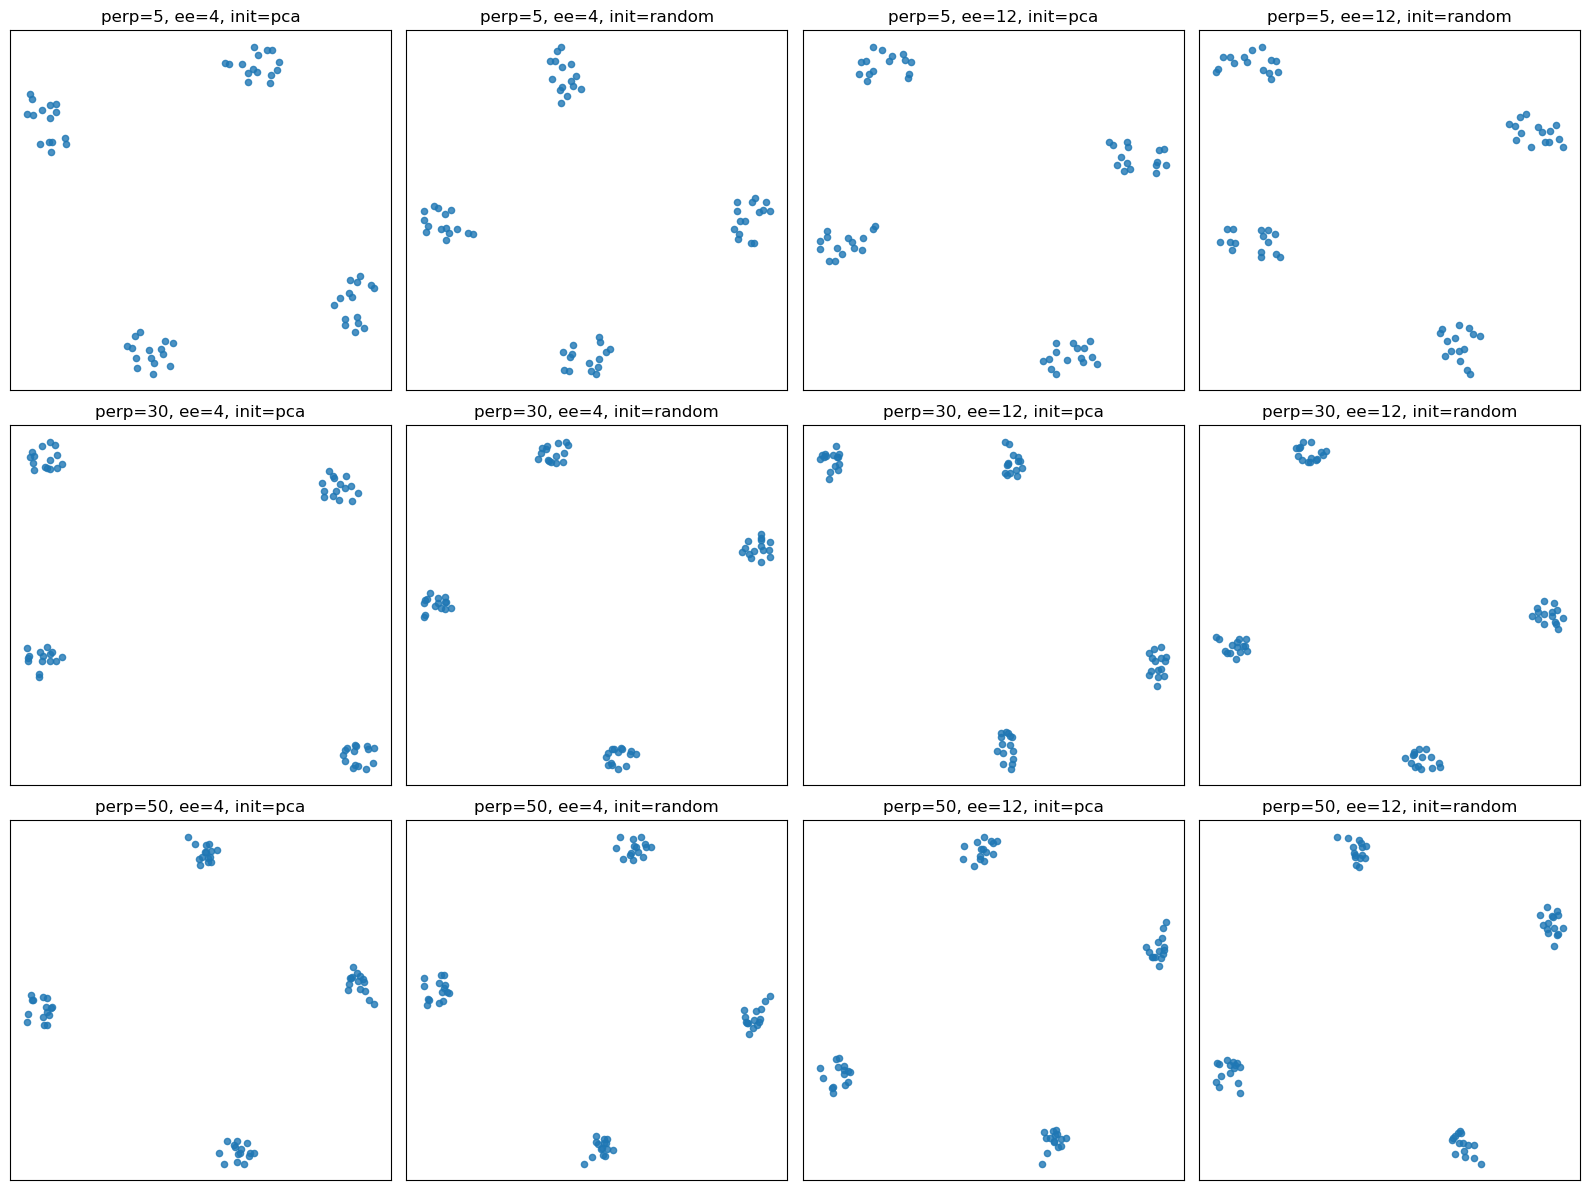

In [243]:
from sklearn.manifold import TSNE

perplexities = [5, 30, 50]
early_exaggerations = [4, 12]
initializations = ['pca', 'random']
n_iter = 1000

results = []

n_rows = len(perplexities)
n_cols = len(early_exaggerations) * len(initializations)

fig, axs = plt.subplots(n_rows, n_cols, figsize = (4*n_cols, 4*n_rows), squeeze=False)

for i, perp in enumerate(perplexities):
    for j, ee in enumerate(early_exaggerations):
        for k, init in enumerate(initializations):
            col_idx = j*len(initializations) + k
            print(f"Running TSNE: perplexity={perp}, early_exaggeration={ee}, init={init}")
            t0 = time.time()
            tsne = TSNE(
                n_components = 2,
                perplexity = perp,
                early_exaggeration = ee,
                init = init,
                max_iter = n_iter,
                learning_rate = 'auto',
                random_state = 42
            )
            Y = tsne.fit_transform(X)
            t1 = time.time()
            runtime = t1 - t0
            print(f"Completed in {runtime:.2f}s")

            results.append({
                'perplexity': perp,
                'early_exaggeration': ee,
                'init': init,
                'runtime_s': runtime,
                'embedding': Y
            })

            ax = axs[i, col_idx]
            ax.scatter(Y[:,0], Y[:,1], s=20, alpha=0.8)
            ax.set_title(f"perp={perp}, ee={ee}, init={init}")
            ax.grid(True)
            ax.set_xticks([])
            ax.set_yticks([])

plt.tight_layout()
plt.show()

t-SNE эффективно выявляет кластеры, при этом перплексия определяет масштаб структуры: низкая дробит кластеры, средняя (~30) балансирует локальное и глобальное, высокая объединяет мелкие группы. Ранняя эксагерация делает кластеры компактнее, а PCA-инициализация стабилизирует результаты и ускоряет сходимость. В целом, оптимально использовать perplexity ~30, early_exaggeration 12 и PCA-инициализацию для быстрой и информативной визуализации.

Running custom t-SNE...
t-SNE iter 0, KL=0.67198
t-SNE iter 200, KL=0.02320
t-SNE iter 400, KL=0.02320
t-SNE iter 600, KL=0.02320
Custom t-SNE done in 0.61s
Running sklearn TSNE...
Sklearn TSNE done in 0.07s


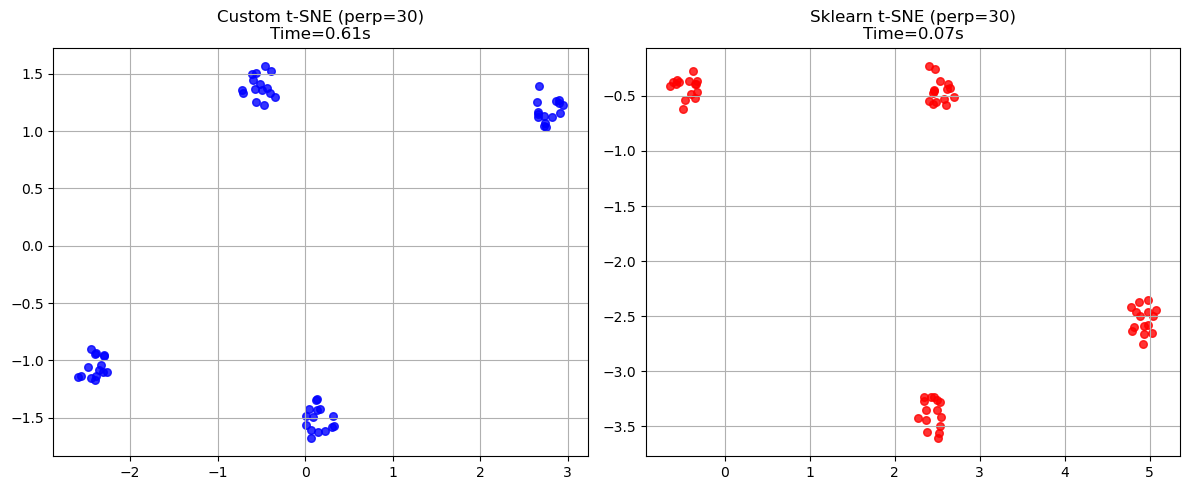

In [246]:
perplexity = 30

D_X = pairwise_sq_dists(X)
P = build_joint_probabilities(D_X, perplexity)

print("Running custom t-SNE...")
t0 = time.time()
Y_custom = run_tsne(P, iters=800, lr=100.0)
t1 = time.time()
time_custom = t1 - t0
print(f"Custom t-SNE done in {time_custom:.2f}s")

print("Running sklearn TSNE...")
t0 = time.time()
tsne_sklearn = TSNE(n_components=2, perplexity=perplexity,
                    early_exaggeration=12, init='pca', max_iter=1000, random_state=42,
                    learning_rate='auto')
Y_sklearn = tsne_sklearn.fit_transform(X)
t1 = time.time()
time_sklearn = t1 - t0
print(f"Sklearn TSNE done in {time_sklearn:.2f}s")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(Y_custom[:,0], Y_custom[:,1], s=30, alpha=0.8, c='blue')
plt.title(f"Custom t-SNE (perp={perplexity})\nTime={time_custom:.2f}s")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], s=30, alpha=0.8, c='red')
plt.title(f"Sklearn t-SNE (perp={perplexity})\nTime={time_sklearn:.2f}s")
plt.grid(True)

plt.tight_layout()
plt.show()

1. Время выполнения: Custom=0.61s, Sklearn=0.07s. Sklearn TSNE значительно быстрее благодаря оптимизациям и PCA-инициализации.
2. Структура кластеров: визуально оба метода выявляют схожие группы точек, но sklearn TSNE часто даёт более компактные и стабильные кластеры.

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

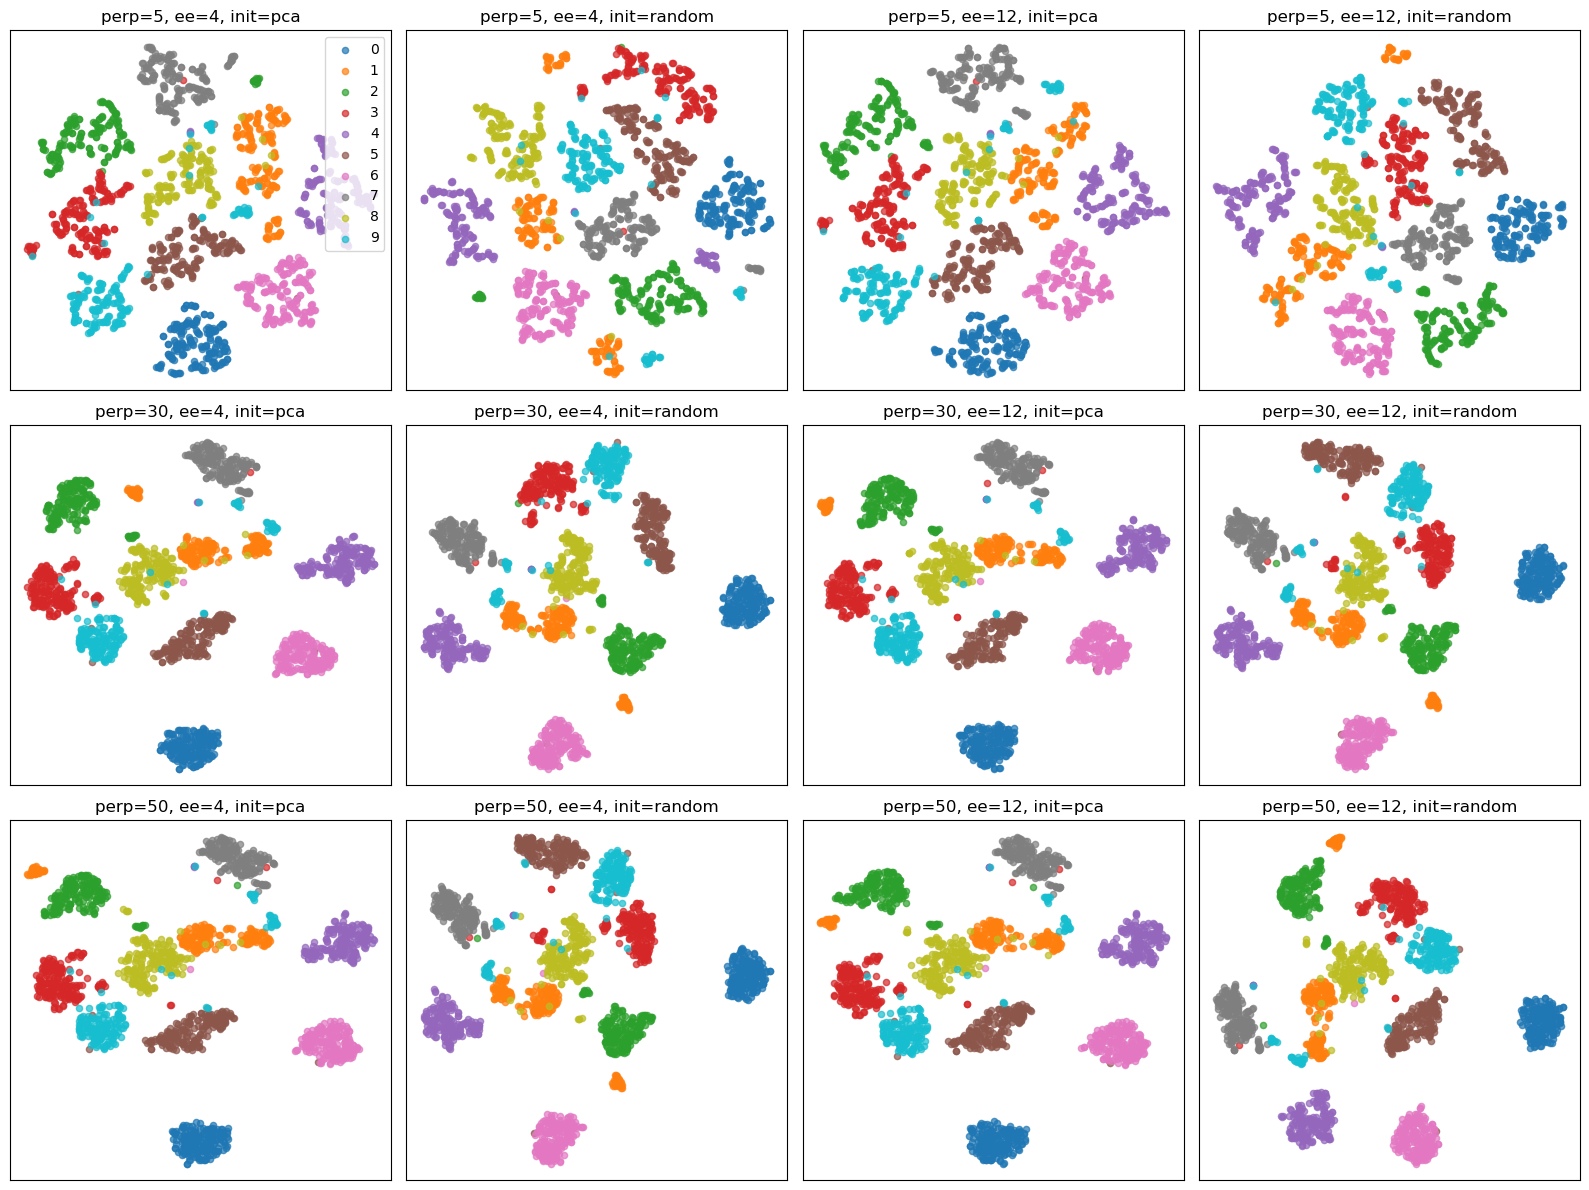

In [249]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape

perplexities = [5, 30, 50]
early_exaggerations = [4, 12]
initializations = ['pca', 'random']
n_iter = 1000

n_rows = len(perplexities)
n_cols = len(early_exaggerations) * len(initializations)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), squeeze=False)

for i, perp in enumerate(perplexities):
    for j, ee in enumerate(early_exaggerations):
        for k, init in enumerate(initializations):
            col_idx = j * len(initializations) + k
            tsne = TSNE(
                n_components=2,
                perplexity=perp,
                early_exaggeration=ee,
                init=init,
                max_iter=n_iter,
                learning_rate='auto',
                random_state=42
            )
            Y = tsne.fit_transform(X)

            ax = axs[i, col_idx]
            for label in np.unique(y):
                ax.scatter(Y[y==label,0], Y[y==label,1], s=20, alpha=0.7, label=str(label))

            ax.set_title(f"perp={perp}, ee={ee}, init={init}")
            ax.grid(True)
            ax.set_xticks([])
            ax.set_yticks([])

            if i==0 and col_idx==0:
                ax.legend(loc='upper right', markerscale=1)

plt.tight_layout()
plt.show()

В целом выводы подтвердились: 
- Perplexity: низкая выделяет локальные связи и дробит кластеры, средняя (~30) балансирует локальное и глобальное, высокая объединяет мелкие группы.

- Early exaggeration: небольшое значение даёт сжатые, менее чёткие кластеры, большое — делает их более компактными и отчётливо разделёнными.

- Инициализация (PCA vs random): PCA стабилизирует положение кластеров и ускоряет сходимость, random даёт вариативность и иногда альтернативные локальные структуры.